In [92]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [93]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv(
    Path('Resources/lending_data.csv')
)
    

# Review the DataFrame
lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [94]:
# Separate the data into labels and features
# Separate the y variable
y = lending_data['loan_status']

# Separate the X variable, the features
X = lending_data.drop(columns='loan_status', axis=1)

In [95]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [96]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [97]:
# Check the balance of our target values
y.value_counts()


0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [98]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [99]:
y_train.shape, y_test.shape

((58152,), (19384,))

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [100]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
log_reg_model = model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [101]:
# Make a prediction using the testing data
y_predictions = log_reg_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [102]:
# Print the balanced_accuracy score of the model
bal_accuracy = balanced_accuracy_score(y_test,y_predictions)
bal_accuracy

0.9520479254722232

In [103]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predictions)

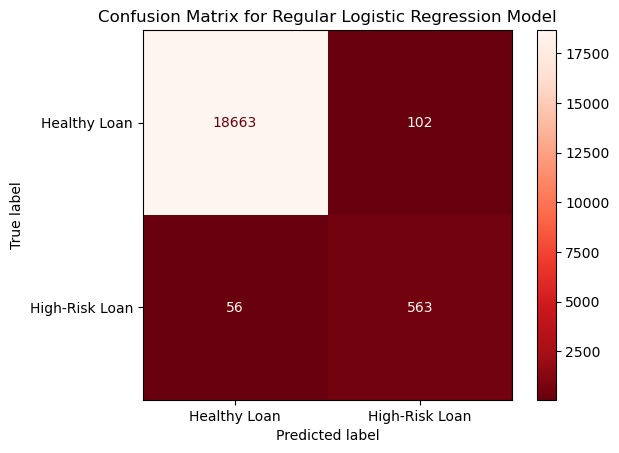

array([[18663,   102],
       [   56,   563]])

In [116]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Healthy Loan", "High-Risk Loan"]
)

# Plot the confusion matrix
disp.plot(cmap='Reds_r')
plt.title("Confusion Matrix for Regular Logistic Regression Model")
plt.show()

# Display confusion matrix for the model
cm

In [121]:
# Print the classification report for the model
print("Classification report for regular model:\n",
      classification_report_imbalanced(y_test,y_predictions))

Classification report for regular model:
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.91      1.00      0.95      0.91     18765
          1       0.85      0.91      0.99      0.88      0.95      0.90       619

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model has demonstrated a high level of accuracy in classifying both healthy loan (0) and high-risk loan (1) labels. The precision for healthy loans is 1.00, meaning that 100% of the loans the model predicted as healthy are actually healthy. The recall for healthy loans is 0.99, indicating that 99% of actual healthy loans were correctly classified.

For high-risk loans, the precision is 0.85, meaning that 85% of the loans the model predicted as high-risk are actually high-risk. The recall for high-risk loans is 0.91, indicating that 91% of actual high-risk loans were correctly classified.

In conclusion, the logistic regression model provides a good overall performance in classifying both healthy and high-risk loans, with some room for improvement in terms of correctly classifying high-risk loans.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [106]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
rand_oversampler = RandomOverSampler(random_state=1)


# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = rand_oversampler.fit_resample(X_train, y_train)

In [107]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [108]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
ovs_model = LogisticRegression(random_state=1)


# Fit the model using the resampled training data
log_reg_ovs_model = ovs_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
ovs_pred = log_reg_ovs_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [109]:
# Print the balanced_accuracy score of the model 
ovs_bal_accuracy = balanced_accuracy_score(y_test, ovs_pred)
ovs_bal_accuracy

0.9936781215845847

In [110]:
# Calculate the confusion matrix for the resampled model
ovs_cm = confusion_matrix(y_test, ovs_pred)

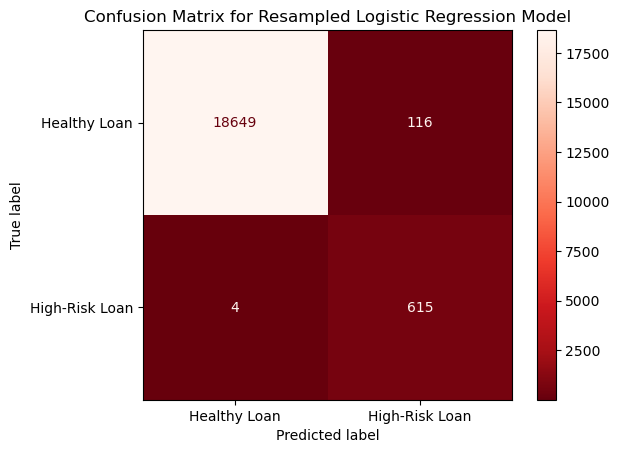

array([[18663,   102],
       [   56,   563]])

In [118]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=ovs_cm,
    display_labels=["Healthy Loan", "High-Risk Loan"]
)

# Plot the confusion matrix
disp.plot(cmap='Reds_r')
plt.title("Confusion Matrix for Resampled Logistic Regression Model")
plt.show()

# Display confusion matrix for the model
cm

In [120]:
# Print the classification report for the model
print("Classification report for resampled model:\n",
      classification_report_imbalanced(y_test, y_ovs_pred))

Classification report for resampled model:
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.99     18765
          1       0.84      0.99      0.99      0.91      0.99      0.99       619

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model fit with oversampled data performs well in predicting both the 0 and 1 labels. The precision and recall scores for both classes are high, with precision scores of 1.00 and 0.84 for the 0 and 1 classes, and recall scores of 0.99 and 0.99 for the 0 and 1 classes respectively. The F1 score for the 1 class is also high at 0.91. The geometric mean and information balance accuracy also show a high level of performance for the oversampled model.

In conclusion, the logistic regression model fit with oversampled data provides an effective solution for predicting loan risk and is capable of accurately identifying both healthy and high-risk loans.